<a href="https://colab.research.google.com/github/AleEscalante/primeros_pasos_data_science/blob/main/desaf%C3%ADo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafío 1
---
1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

---
##1. Importar datos para trabajar (Obtención de datos)

In [67]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersión de datos/inmuebles_bogota.csv')
inmuebles.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


---
##2. Adecuamos los headers y preparamos los datos para su análisis (Preparación y limpieza de datos)

In [68]:
columnas = {'Baños':'Banos','Área':'Area'}

inmuebles = inmuebles.rename(columns=columnas)
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


La columna Valor debe ser de tipo float así que debemos transformarla. Para ello vamos a reemplazar a quitar el signo de moneda y dejaremos solo la cadena de texto con el número.

In [69]:
inmuebles['Valor'] = inmuebles['Valor'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.replace('$', '', regex=False).astype(float)
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.600000e+08
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,6.700000e+08
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120000e+09
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,8.900000e+08
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,9.700000e+08


---
##3. Exploramos los datos y nos damos una idea de su naturaleza (Exploración)

###3.1 Indagamos sobre que tipo de datos tenemos


In [70]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 595.1+ KB


###3.2 Obtenemos algunos datos de estadística descriptiva para las columnas numéricas del DataFrame

In [71]:
inmuebles.describe()

,Habitaciones,Banos,Area,Valor
count,9520.000000,9520.000000,9520.000000,9.520000e+03
mean,3.072479,2.447899,146.664706,6.020624e+08
std,2.049856,1.255314,1731.379622,7.046021e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.091825e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,166243.000000,1.600000e+10


3.3 Obtenemos la distribución de valores para columnas categóricas

In [72]:
inmuebles['Tipo'].value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

In [73]:
inmuebles['Barrio'].value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [74]:
inmuebles['UPZ'].value_counts()

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPZ, Length: 63, dtype: int64

---
##4. Visualicemos nuestros datos

<Axes: xlabel='Valor', ylabel='Count'>

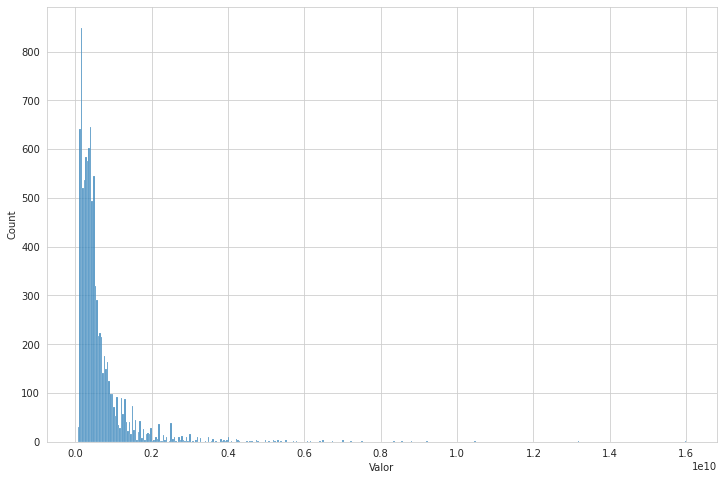

In [82]:
plt.figure(figsize=(12, 8))

sns.histplot(inmuebles['Valor'])

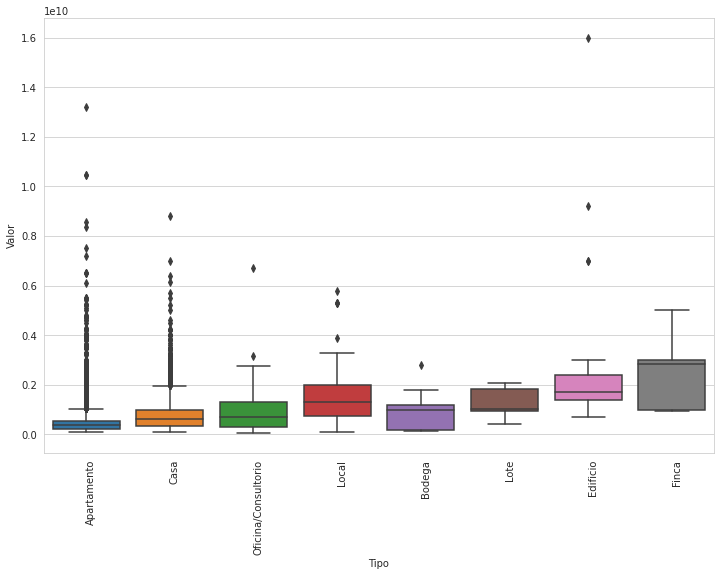

In [84]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Tipo', y='Valor', data=inmuebles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
plt.show()

<Axes: xlabel='Area', ylabel='Valor'>

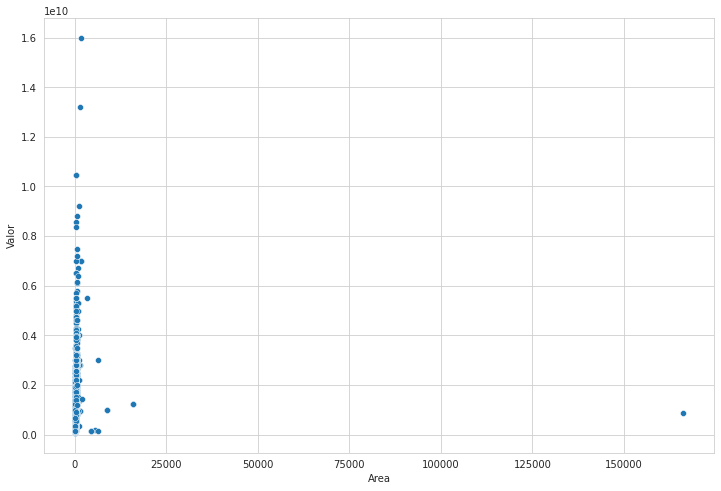

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Area', y='Valor', data=inmuebles)

---
##5. Planteamiento de algunas hipótesis
1. Los inmuebles con más habitaciones tienden a ser más caros.
2. Los inmuebles en barrios más exclusivos tienen un valor más alto.
3. El tamaño del área de un inmueble está relacionado con su valor.

---
##6. Comprobación de hipótesis

Hipótesis #1: Los inmuebles con más habitaciones tienden a ser más caros.

In [90]:
inmuebles.groupby('Habitaciones')['Valor'].mean().sort_values(ascending=False)

Habitaciones
22     9.200000e+09
15     3.620000e+09
16     3.062222e+09
12     1.903706e+09
18     1.766667e+09
20     1.766667e+09
14     1.742727e+09
11     1.281250e+09
13     1.154576e+09
10     1.105887e+09
4      1.097161e+09
5      1.038058e+09
6      1.013835e+09
8      9.369091e+08
9      9.006047e+08
7      7.777310e+08
3      5.400501e+08
110    4.800000e+08
2      4.273113e+08
1      4.131581e+08
32     2.905000e+08
Name: Valor, dtype: float64

In [105]:
inmuebles[['Valor', 'Habitaciones']].corr()

,Valor,Habitaciones
Valor,1.000000,0.244292
Habitaciones,0.244292,1.000000


<Axes: xlabel='Habitaciones', ylabel='Valor'>

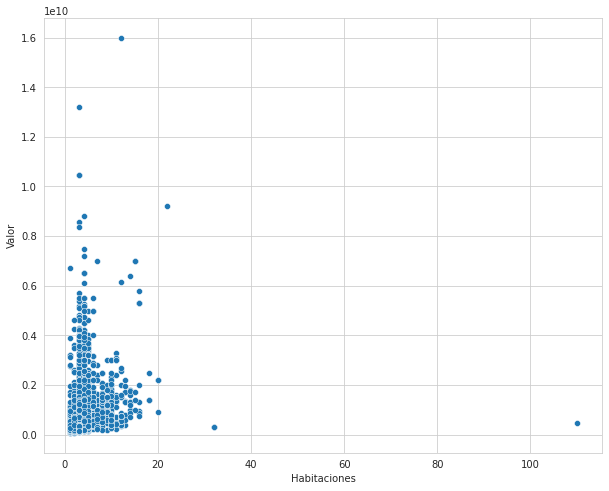

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=inmuebles, x='Habitaciones', y='Valor')

---
Hpótesis #2: Los inmuebles en barrios más exclusivos tienen un valor más alto.

In [103]:
inmuebles_barrios = inmuebles.groupby('Barrio')['Valor'].mean().sort_values(ascending=False)
inmuebles_barrios

Barrio
Santa Ana         3.172500e+09
La Candelaria     1.544228e+09
El Retiro         1.528421e+09
Los Rosales       1.479647e+09
Quinta Camacho    1.449216e+09
                      ...     
Zona Franca       1.600000e+08
Bosa              1.585748e+08
La Estanzuela     1.400000e+08
Bosa Porvenir     1.330000e+08
Buenos Aires      1.300000e+08
Name: Valor, Length: 149, dtype: float64

<Axes: xlabel='Barrio'>

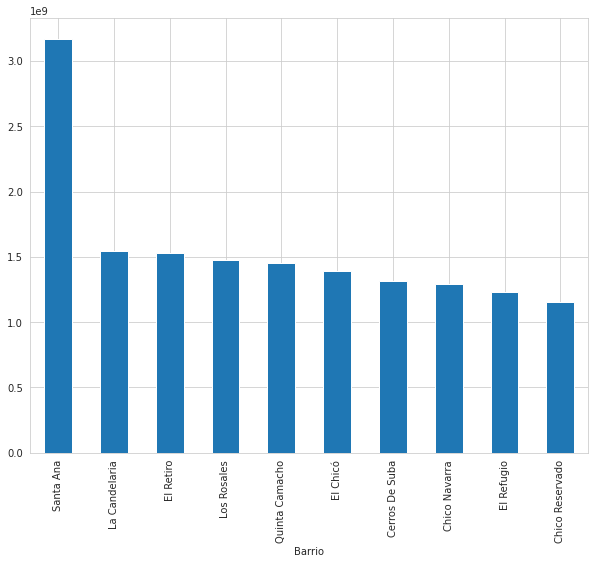

In [104]:
plt.figure(figsize=(10, 8))
inmuebles_barrios.head(10).plot.bar()

---
Hipótesis #3: El tamaño del área de un inmueble está relacionado con su valor.

In [94]:
inmuebles[['Valor', 'Area']].corr()

,Valor,Area
Valor,1.000000,0.057585
Area,0.057585,1.000000


##7. Respuestas a desafío #1

---
1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

<Axes: xlabel='Barrio'>

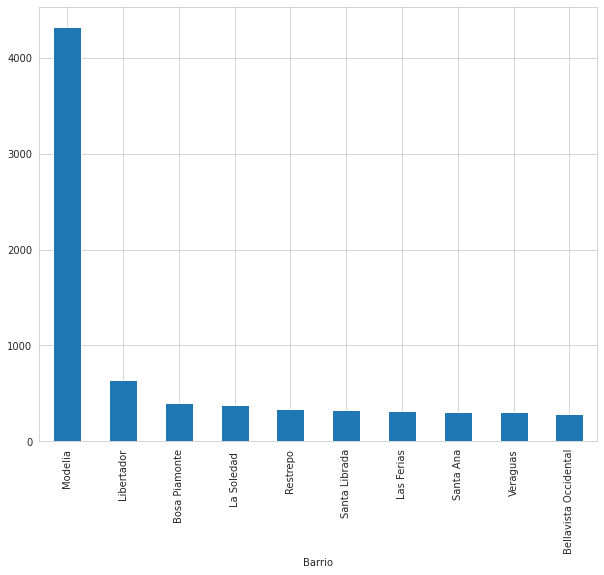

In [113]:
prom_area_por_barrios = inmuebles.groupby('Barrio')['Area'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
prom_area_por_barrios.head(10).plot.bar()

---
2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.


In [108]:
inmuebles.describe()

,Habitaciones,Banos,Area,Valor
count,9520.000000,9520.000000,9520.000000,9.520000e+03
mean,3.072479,2.447899,146.664706,6.020624e+08
std,2.049856,1.255314,1731.379622,7.046021e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.091825e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,166243.000000,1.600000e+10
